In [ ]:
#Observations:
    #The mice are evenly distributed between the two genders.  Gender has no effect on the results of the study.
    #There is a positive correlation between the weight of the mice and the size of their tumors. 
    

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np



In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"



In [4]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#view mouse_metadata data [249]
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
# view study_results data [1893]
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [6]:
# Combine the data into a single dataset
mouse_merged = pd.merge(mouse_metadata,study_results,on="Mouse ID",how="outer")

# Display the data table for preview
mouse_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice.
mouse_merged.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   2
z969      Naftisol      Male    9           30          45         73.867845           4                   1
i334      Ramicane      Female  8           20          30         39.005554           1                   1
i177      Ramicane      Male    10          18          20         35.345361           0                   1
                                                        25         34.082180           1                   1
                                                                                                          ..
q610      Ramicane      Female  18          21          25         40.146450           0                   1
                                                        30         40.668343           1                   1
                        

In [8]:
mouse_merged.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = mouse_merged[mouse_merged.duplicated(["Mouse ID", "Timepoint"])]


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice = duplicated_mice[duplicated_mice.duplicated(["Mouse ID"])]
duplicated_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicates = duplicated_mice.drop([911,913,915,917])

In [12]:
# Need Help Removing ALL of Duplicated Mouse information from merged data
clean_merged = mouse_merged.drop([911,913,915,917])
# Verifying the number of mice in the clean DataFrame.
clean_merged.count()

Mouse ID              1889
Drug Regimen          1889
Sex                   1889
Age_months            1889
Weight (g)            1889
Timepoint             1889
Tumor Volume (mm3)    1889
Metastatic Sites      1889
dtype: int64

In [13]:
mouse_merged.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [14]:
#Summary Statistics
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen
Regimen_group = clean_merged.groupby("Drug Regimen")
Regimen_group.mean()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989
Propriva,10.636943,27.070064,16.974522,52.346371,0.993631
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

drug_means = Regimen_group["Tumor Volume (mm3)"].mean()
#drug_means

drug_median = Regimen_group["Tumor Volume (mm3)"].median()
#drug_median

drug_var = Regimen_group["Tumor Volume (mm3)"].var()
#drug_var

drug_std = Regimen_group["Tumor Volume (mm3)"].std()
#drug_std

drug_SEMs = Regimen_group["Tumor Volume (mm3)"].sem()
drug_SEMs


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.524620
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [16]:
drugs_summary = pd.DataFrame({
            ("Drug Mean") : drug_means,
            ("Drug Median") : drug_median,
            ("Drug Variance") : drug_var,
            ("Drug Standard Variation") : drug_std,
            ("Drug SEM") : drug_SEMs
    
                })

drugs_summary

,Drug Mean,Drug Median,Drug Variance,Drug Standard Variation,Drug SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.346371,50.854632,43.210447,6.573465,0.524620
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [40]:
drugs_conclusion = drugs_summary.sort_values("Drug Mean")
drugs_conclusion

,Drug Mean,Drug Median,Drug Variance,Drug Standard Variation,Drug SEM
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.346371,50.854632,43.210447,6.573465,0.524620
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and /
# SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

#summaryDF = Regimen_group["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
print(Regimen_group["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"]))

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.346371  50.854632  43.210447  6.573465  0.524620
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [19]:
# BAR and PIE Charts

In [20]:
# Teachable moment ===  why doesn't this work
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

x_axis = np.arange(len(Regimen_group))
y_axis = (Regimen_group["Mouse ID"].count())

(Regimen_group["Mouse ID"].count())


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     157
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

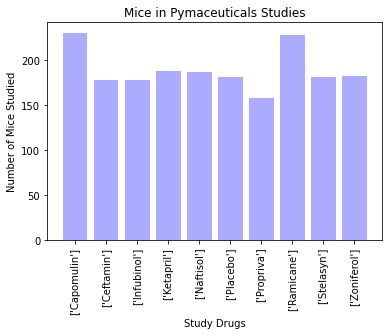

In [21]:
# Teachable moments continued -- what am I doing wrong here?


tickLocations = [value for value in x_axis]
#plt.xticks(tickLocations, Regimen_group["Drug Regimen"].unique(), rotation="vertical")
plt.bar(x_axis, y_axis, color="b", alpha=.33, align="center")
plt.xticks(tickLocations, Regimen_group["Drug Regimen"].unique(), rotation="vertical")

plt.title("Mice in Pymaceuticals Studies")
plt.xlabel("Study Drugs")
plt.ylabel("Number of Mice Studied")
plt.show


Text(0, 0.5, 'Number of Mice Studied')

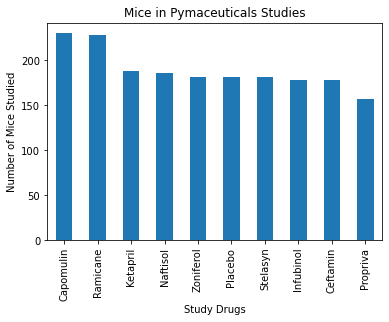

In [22]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#pandas version of the plot

counts = clean_merged["Drug Regimen"].value_counts()
counts.plot(kind="bar")
plt.title("Mice in Pymaceuticals Studies")
plt.xlabel("Study Drugs")
plt.ylabel("Number of Mice Studied")

Text(0, 0.5, 'Number of Mice Studied')

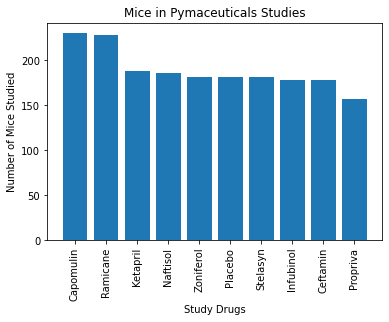

In [23]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

drug_group = clean_merged["Drug Regimen"].value_counts()
#drug_group
#drug_group.plot(kind="bar",facecolor="blue")

plt.bar(drug_group.index.values,drug_group.values)
plt.xticks(rotation=90)
plt.title("Mice in Pymaceuticals Studies")
plt.xlabel("Study Drugs")
plt.ylabel("Number of Mice Studied")


In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#using count and groupby to generate table get gender counts of mice studied.

Gender_group = mouse_metadata.groupby("Sex").count()
Gender_group

,Mouse ID,Drug Regimen,Age_months,Weight (g)
Sex,,,,
Female,124,124,124,124
Male,125,125,125,125


<AxesSubplot:ylabel='Sex'>

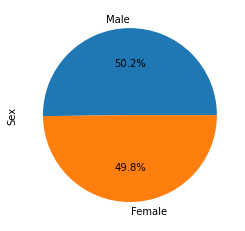

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_metadata["Sex"].value_counts()
gender = mouse_metadata["Sex"].value_counts()
gender.plot.pie(autopct="%1.1f%%")


<function matplotlib.pyplot.show(close=None, block=None)>

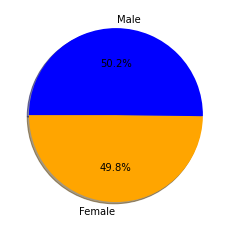

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Matplotlib's pyplot

mouse_metadata["Sex"].count()
sizes = [124, 125]
labels = ["Female", "Male"]
colors = ["orange", "blue"]
explode = (0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis = ("equal")
plt.show

In [27]:
#Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoints = study_results.groupby("Mouse ID").max()
#timepoints

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoints_merge = pd.merge(mouse_metadata, timepoints, on="Mouse ID", how="outer")
#timepoints_merge

CapomulinDF = timepoints_merge.loc[timepoints_merge["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]
#CapomulinDF

RamicaneDF = timepoints_merge.loc[timepoints_merge["Drug Regimen"] == "Ramicane", "Tumor Volume (mm3)"]
#RamicaneDF

InfubinolDF = timepoints_merge.loc[timepoints_merge["Drug Regimen"] == "Infubinol", "Tumor Volume (mm3)"]
#InfubinolDF

CeftaminDF = timepoints_merge.loc[timepoints_merge["Drug Regimen"] == "Ceftamin", "Tumor Volume (mm3)"]
CeftaminDF


52     62.999356
65     45.000000
66     56.057749
68     55.742829
97     48.722078
111    47.784682
118    61.849023
122    68.923185
133    67.748662
134    57.918381
135    46.784535
136    59.851956
139    64.299830
155    59.741901
171    61.433892
175    64.192341
195    45.000000
199    52.925348
200    45.000000
216    67.527482
228    45.000000
232    64.634949
235    61.386660
241    68.594745
242    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [29]:
#times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
#fig1, ax1 = plt.subplots()
#ax1.set_title('Reaction Times at Baseball Batting Cage')
#ax1.set_ylabel('Reaction Time (ms)')
#ax1.boxplot(times)
#plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

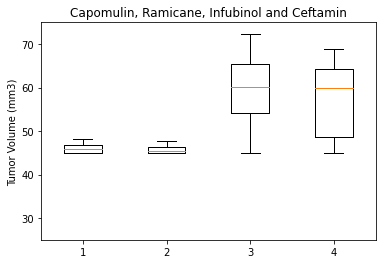

In [30]:
treatments = [CapomulinDF, RamicaneDF, InfubinolDF, CeftaminDF]
fig1, ax1 = plt.subplots()
ax1.set_title("Capomulin, Ramicane, Infubinol and Ceftamin")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(treatments)
plt.ylim(25,75)

plt.show

Capomulin Outliers: 42.376491720000004 49.37251379999999
Ramicane Outliers: 42.984251445 48.359580925
Infubinol Outliers: 36.83290494999999 82.74144559000001
Ceftamin Outliers: 25.355449580000002 87.66645829999999


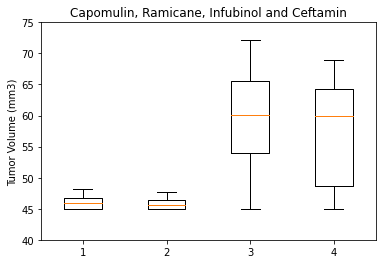

In [31]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = [CapomulinDF, RamicaneDF, InfubinolDF, CeftaminDF]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = CapomulinDF.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
    
quartiles2 = RamicaneDF.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)  

quartiles3 = InfubinolDF.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)


quartiles4 = CeftaminDF.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)

treatments = [CapomulinDF, RamicaneDF, InfubinolDF, CeftaminDF]
fig1, ax1 = plt.subplots()
ax1.set_title("Capomulin, Ramicane, Infubinol and Ceftamin")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(treatments)
plt.ylim(40,75)
plt.show
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
# Calculate the summary statistics and plot the histogram of the sample data using iloc
subset = timepoints_merge.iloc[range(45,50)]    
    
    # Determine outliers using upper and lower bounds
print(f"Capomulin Outliers: {lower_bound} {upper_bound}")
print(f"Ramicane Outliers: {lower_bound2} {upper_bound2}")
print(f"Infubinol Outliers: {lower_bound3} {upper_bound3}")
print(f"Ceftamin Outliers: {lower_bound4} {upper_bound4}")
    

In [32]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [33]:
# Line and Scatter Plots

In [34]:
Mouse_i557 = clean_merged.loc[mouse_merged["Mouse ID"] == "i557", ["Timepoint", "Tumor Volume (mm3)"]]
Mouse_i557

,Timepoint,Tumor Volume (mm3)
431,0,45.000000
432,5,42.261665
433,10,42.992077
434,15,43.529876
435,20,43.967895
436,25,44.596219
437,30,45.261384
438,35,45.941949
439,40,46.821070
440,45,47.685963


Text(0, 0.5, 'Tumor Volume (mm3)')

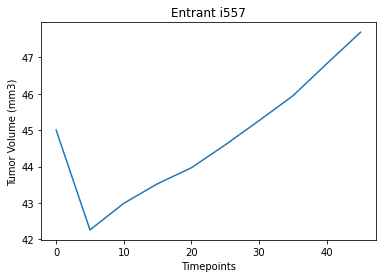

In [35]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#CapomulinDF = timepoints_merge.loc[timepoints_merge["Drug Regimen"] == "Capomulin", ("Mouse ID", "Tumor Volume (mm3)")]
#CapomulinDF
Mouse_i557 = clean_merged.loc[clean_merged["Mouse ID"] == "i557", ["Timepoint", "Tumor Volume (mm3)"]]
#Mouse_i557
x_axis = Mouse_i557["Timepoint"]
y_axis = Mouse_i557["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.show
plt.title("Entrant i557")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")


In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
df = clean_merged.loc[clean_merged["Drug Regimen"]=="Capomulin",[("Mouse ID"), ("Tumor Volume (mm3)"), ("Weight (g)")]]
drug_average = df.groupby("Mouse ID").mean()
drug_average

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22
i557,44.805810,24
i738,39.141053,20
j119,44.465236,23
j246,43.216925,21


<function matplotlib.pyplot.show(close=None, block=None)>

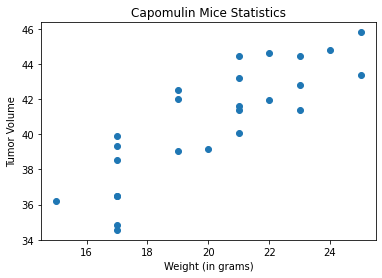

In [37]:
plt.scatter(drug_average["Weight (g)"],drug_average["Tumor Volume (mm3)"])
plt.title("Capomulin Mice Statistics")
plt.ylabel("Tumor Volume")
plt.xlabel("Weight (in grams)")
plt.show

In [38]:
#Correlation and Regression

The r-squared is: 0.7088568047708717


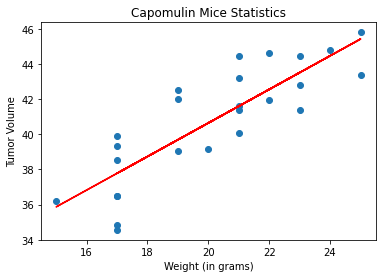

In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

y_values = drug_average["Tumor Volume (mm3)"]
x_values = drug_average["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Capomulin Mice Statistics")
plt.ylabel("Tumor Volume")
plt.xlabel("Weight (in grams)")
print(f"The r-squared is: {rvalue**2}")
